# **Prepare datasets**

Kita akan memakai dataset NusaX dari paper [berikut](https://arxiv.org/pdf/2205.15960.pdf). Dataset bisa diunduh di [sini](https://drive.google.com/drive/folders/1z1V_dGuEgjZJ2RiauaEcGLkHjBMAwcuO?usp=sharing). Di dalamnya terdapat "train.csv", "valid.csv", dan "test.csv".

Setelah kita download dataset, kita upload ke Google Colab. Setelah itu kita panggil dengan Pandas dan karena file nya terpisah, kita gabung menjadi 1.

In [ ]:
import pandas as pd


In [ ]:
pip show keras

Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow


In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)


# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 70% untuk train dan 30% untuk test. Untuk model ini upload file dari pickle

# **Training**

In [ ]:
import pickle

with open('tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)
with open('X_train_padded.pickle', 'rb') as f:
    X_train = pickle.load(f)
with open('X_test_padded.pickle', 'rb') as f:
    X_test = pickle.load(f)
with open('y_train_lstm.pickle', 'rb') as f:
    y_train = pickle.load(f)
with open('y_test_lstm.pickle', 'rb') as f:
    y_test = pickle.load(f)

Jalankan training dengan metode LSTM. Arsitektur LSTM ini dibangun menggunakan framework Tensorflow.

In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

Adapun arsitektur model LSTM yang dignakan sebagai berikut:


*   Input Layer: Data teks setelah dilakukan Feature Extraction, dikondisikan menjadi sebuah matrix berdimensi 100.
*   Embedding Layer dengan dimensi 100 dan max_features 100.000 untuk mengubah kata-kata dalam teks menjadi vektor yang dapat diproses oleh model.
*   LSTM Layer: dengan Unit neuron 16 dan dropout 0,9
*   Dense Layer (Fully Connected Layer) : dengan neuron 3 dan activation Softmax (untuk klasifikasi)
*   Model Compilation: dengan loss function dengan categorical_hinge, menggunakan optimizer Adam

Terakhir, kami melakukan training dan validation untuk dataset selama 10 epoch dengan ukuran batch 128

In [ ]:
embed_dim = 100
units = 16
max_features = 100000

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(LSTM(units, dropout=0.9))
model.add(Dense(3,activation='softmax'))

# adam = optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'categorical_hinge', optimizer = "Adam", metrics = ['accuracy'])
print(model.summary())

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.5349 - loss: 0.9666 - val_accuracy: 0.7160 - val_loss: 0.6317
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7290 - loss: 0.5910 - val_accuracy: 0.7604 - val_loss: 0.5305
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.7597 - loss: 0.5170 - val_accuracy: 0.7627 - val_loss: 0.4903
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.7740 - loss: 0.4709 - val_accuracy: 0.7682 - val_loss: 0.4665
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.7796 - loss: 0.4432 - val_accuracy: 0.7759 - val_loss: 0.4457
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.7896 - loss: 0.4160 - val_accuracy: 0.7810 - val_loss: 0.4263
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.8039 - loss: 0.3802 - val_accuracy: 0.7828 - val_loss: 0.4090
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.8021 - loss: 0.3785 - val_

## Confussion Matrix, Accuracy, F1, Recall, Precision

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [ ]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       706
           1       0.81      0.52      0.63       223
           2       0.88      0.92      0.90      1258

    accuracy                           0.84      2187
   macro avg       0.82      0.74      0.77      2187
weighted avg       0.84      0.84      0.84      2187



Hasilnya nilai F1 Score ada pada angka 0.78 untuk Negative, 0.63 untuk Neutral, dan 0.90 untuk Positive. Namun akurasi keseluruhan model dapat 0.84

## Visualization

Mekanisme evaluasi selanjutnya menggunakan "Visualization", yaitu mengecek performa training dari arah visualisasinya. Acuan apakah visualisasi bagus atau tidak "Good Fit", sebagai berikut:

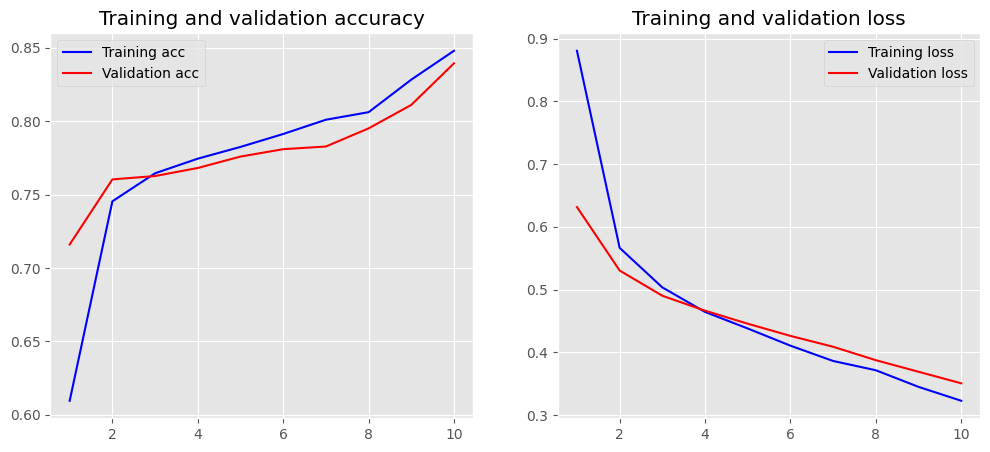

In [ ]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
Confusion Matrix:
[[ 558   10  138]
 [  86  116   21]
 [  79   17 1162]]


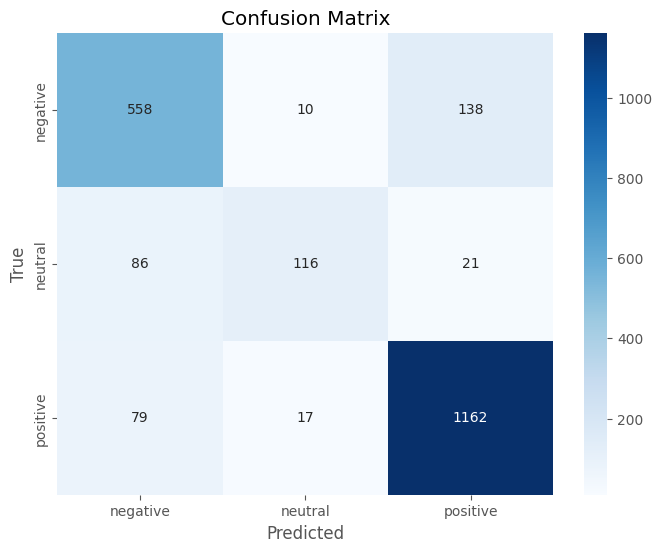

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.79      0.78       706
     neutral       0.81      0.52      0.63       223
    positive       0.88      0.92      0.90      1258

    accuracy                           0.84      2187
   macro avg       0.82      0.74      0.77      2187
weighted avg       0.84      0.84      0.84      2187



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the label mapping
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Ensure the predictions are made in an efficient way
predictions = model.predict(X_test)

# Convert predictions to label format
if predictions.ndim > 1:
    predictions_labels = np.argmax(predictions, axis=1)
else:
    predictions_labels = predictions

# Assuming Y_test is already in label format
Y_test_labels = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

# Map the numerical labels to string labels for display
predictions_labels_str = [label_mapping[label] for label in predictions_labels]
Y_test_labels_str = [label_mapping[label] for label in Y_test_labels]

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_labels_str, predictions_labels_str, labels=['negative', 'neutral', 'positive'])
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
report = classification_report(Y_test_labels_str, predictions_labels_str, target_names=['negative', 'neutral', 'positive'])
print("Classification Report:")
print(report)

Hasilnya jika kita melihat visualisasinya model yang kita kembangkan cukup baik tapi hampir overfitting



In [ ]:
model.save('model.h5')
print("Model has created!")

Model has created!


# Predict

In [ ]:
import re
from keras.models import load_model
import pickle

input_text = """
nilai tugas kemarin sangat mengecewakan
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

tokenizer = pickle.load(open("tokenizer.pickle",'rb'))

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X_test.shape[1])

model = load_model('model.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
Text:   nilai tugas kemarin sangat mengecewakan 
Sentiment:  negative


In [ ]:
df_dataraw = pd.read_csv('data.csv', encoding='latin-1')
df_dataraw

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


Prediction on Dataset

In [ ]:
df_data = df_dataraw[['Tweet']].head(50)
df_data

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...
6,deklarasi pilkada 2018 aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...
8,Nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe'


In [ ]:
import sqlite3
conn = sqlite3.connect('challenge_database.db')

In [ ]:

#read stopword_table
stopword_table = pd.read_sql_query("""
                    SELECT
                        *
                    FROM stopword_table
                  """, conn)
conn.close()

def remove_stopwords(data):
    return " ".join(x for x in data.split() if x not in stopword_table.stopword.values.tolist())
    # return ' '.join([word for word in data.split() if all(stop not in word for stop in set(stopword_table['stopword']))]) #menghapus kata yang ada di stopword_table

def clean_data(data):
    data = data.lower() #membuat semua huruf menjadi lower case
    data = data.strip() #menghapus white space di awal dan akhir
    # data = re.sub('\brt\b',' ',data, flags=re.IGNORECASE) #hapus rt
    data = re.sub('user',' ',data) #hapus kata user
    data = re.sub(r'#[\S]+', '', data)  #hapus hashtag
    data = re.sub('url',' ',data) #hapus 'url'
    data = re.sub(r'(http\S+)|((www\.[^\s]+))',' ',data) #hapus link url
    data = re.sub(r'\bx([a-fA-F0-9]{2})', '', data) #hapus unicode
    data = re.sub('[^a-zA-Z0-9]+', ' ', data) #hapus selain alfanumeric
    data = remove_stopwords(data) #menghapus stopword
    data = data.strip() #menghapus white space di awal dan akhir
    return data

In [ ]:
def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

tokenizer = pickle.load(open("tokenizer.pickle",'rb'))

def predict_sentiment(text):
    text = [cleansing(text)]
    predicted = tokenizer.texts_to_sequences(text)
    guess = pad_sequences(predicted, maxlen=X_test.shape[1])
    prediction = model.predict(guess)
    polarity = np.argmax(prediction[0])
    return sentiment[polarity]

# Apply cleansing
df_data['cleaned_text'] = df_data['Tweet'].apply(cleansing)

# Apply the prediction function to the DataFrame
df_data['predicted_sentiment'] = df_data['cleaned_text'].apply(predict_sentiment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━

In [ ]:
df_data['HS'] = df_dataraw['HS']

In [ ]:
df_data

,Tweet,cleaned_text,predicted_sentiment,HS
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...,negative,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...,negative,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...,positive,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...,negative,0
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,negative,1
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,user ya bani taplak dkk xf0 x9f x98 x84 xf0 x...,negative,1
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilkada 2018 aman dan anti hoax warg...,negative,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,gue baru aja kelar re watch aldnoah zero pa...,negative,0
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi port terbaik nak m...,positive,0
9,USER Enak lg klo smbil ngewe',user enak lg klo smbil ngewe,neutral,0
